In [25]:
#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
# bmi열의 결측치에 bmi의 중앙값인 28.1을 입력함
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-26-88977c971aa2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [27]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [28]:
# 성별이 Other인 row(1명)만 삭제 == 성별이 Other이 아닌 데이터들만 남기고 새로운 df인 df_g 만들기기
df_g = df[df['gender'] != "Other"]

# 나이가 20세 미만인 row를 찾고 나이가 20이상인 사람들만 남기기
df_a = df_g[df_g['age'] >= 20.00 ]

# bmi가 80 미만인 사람들만 남기기
df_b = df_a[df_a['bmi'] < 80 ]
df_b

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


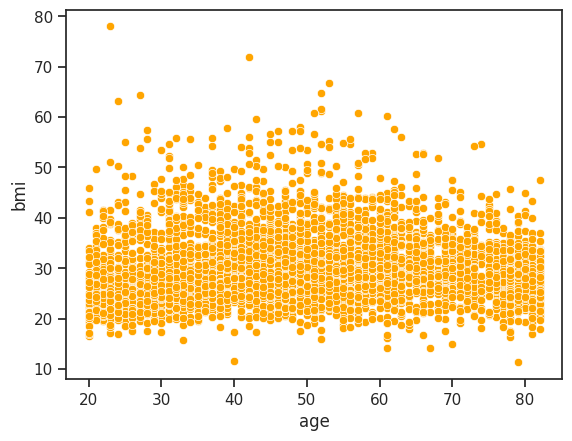

In [29]:
# scatter plot = df_b로
import seaborn as sns

sns.scatterplot(data=df_b, x='age', y='bmi',  color='orange')
plt.show()

In [30]:
# %%
# 범주형 데이터(문자열 타입) 원핫인코딩? (라벨 분류로 함)
# 대상: work_type, Residence_type, smoking_status
from sklearn.preprocessing import LabelEncoder

# 1) work_type 대상
le_w = LabelEncoder()
label_w = le_w.fit_transform(df_b['work_type'])
df_b.drop("work_type", axis=1, inplace=True)
df_b['work_type'] = label_w
df_b.head(50)

# %%
# %%
# work_type=1.0인 row 찾기(테스트) <-- 혹시 children인지 확인하고 싶었음
# children은 20세 이상이기 때문에 df_b에 없음을 위의 plt에서 확인할 수 있음
f = df_b[df_b['work_type'] == 1.0 ]
f

# 61408,Male,23,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
# 분류>
# Govt_job : 0.0
# Never_worked : 1.0
# Private : 2.0
# Self-employed : 3.0
# %%
# 2) smoking_status 대상
le_s = LabelEncoder()
label_s = le_s.fit_transform(df_b['smoking_status'])
df_b.drop("smoking_status", axis=1, inplace=True)
df_b['smoking_status'] = label_s
df_b

# 분류>
# Unknown : 0
# formerly smoked : 1
# never smoked : 2
# smokes : 3
# %%
# %%
# 3) Residence_type 대상
le_r = LabelEncoder()
label_r = le_r.fit_transform(df_b['Residence_type'])
df_b.drop("Residence_type", axis=1, inplace=True)
df_b['Residence_type'] = label_r
df_b

# 분류>
# Rural : 0
# Urban : 1
# %%
# %%
# 4) ever_married 대상
le_e = LabelEncoder()
label_e = le_e.fit_transform(df_b['ever_married'])
df_b.drop("ever_married", axis=1, inplace=True)
df_b['ever_married'] = label_e
df_b

# 분류>
# Yes : 1
# No : 0
# %%
# %%
# 5) gender 대상
le_g = LabelEncoder()
label_g = le_g.fit_transform(df_b['gender'])
df_b.drop("gender", axis=1, inplace=True)
df_b['gender'] = label_g
df_b

# 분류 >
# Male : 1
# Female : 0
# %%

# %%
# stroke를 target feature로 하기 위해서 데이터 프레임 reshape
df_b=df_b[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type', 'smoking_status', 'Residence_type', 'ever_married', 'stroke']]
df_b

'''
SMOTE는 traning data에만 적용해야함, test dataset에 적용 X
범주형 데이터가 있으면 LabelEncoder 또는 OneHotEncoder 적용해야 SMOTE 작동함
'''

<ipython-input-30-d647be09cdbf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b.drop("work_type", axis=1, inplace=True)
<ipython-input-30-d647be09cdbf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['work_type'] = label_w
<ipython-input-30-d647be09cdbf>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b.drop("smoking_status", axis=1, inplace=True)
<ipython-input

'\nSMOTE는 traning data에만 적용해야함, test dataset에 적용 X\n범주형 데이터가 있으면 LabelEncoder 또는 OneHotEncoder 적용해야 SMOTE 작동함\n'

In [31]:

# %%
# SMOTE Test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_b.drop('stroke', axis=1) #타겟 속성
y = df_b['stroke'] # 타겟

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("ORiginal dataset shape: ", y.value_counts())
print("Resampled dataset shape: ", pd.Series(y_resampled).value_counts())


ORiginal dataset shape:  stroke
0    3895
1     247
Name: count, dtype: int64
Resampled dataset shape:  stroke
1    3895
0    3895
Name: count, dtype: int64


      id  gender   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0   9046       1  67.0             0              1             228.69  36.6   
1  51676       0  61.0             0              0             202.21  28.1   
2  31112       1  80.0             0              1             105.92  32.5   
3  60182       0  49.0             0              0             171.23  34.4   
4   1665       0  79.0             1              0             174.12  24.0   

   work_type  smoking_status  Residence_type  ever_married  stroke  
0          2               1               1             1       1  
1          3               2               0             1       1  
2          2               2               0             1       1  
3          2               3               1             1       1  
4          3               2               0             1       1  
stroke
1    3895
0    3895
Name: count, dtype: int64
                 id       gender          age  hyper

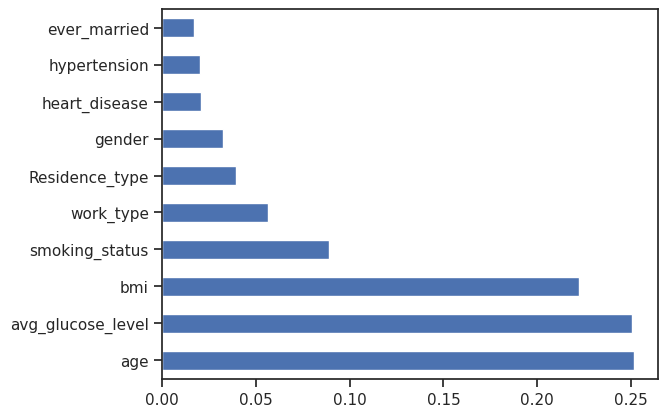

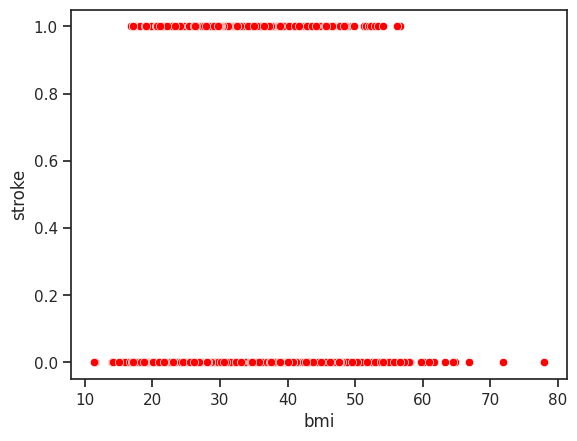

In [32]:
# %%
import pandas as pd

# SMOTE로 생성된 데이터를 DataFrame으로 변환
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['stroke'] = y_resampled

# 상위 일부 행 출력
print(df_resampled.head())

# 클래스 분포 확인
print(df_resampled['stroke'].value_counts())

# 기본 통계 요약 보기
print(df_resampled.describe())


# %%
df_resampled
# %%
# %%
# Feature importance scoring

X = df_b.iloc[:, 1:11]
y = df_b.iloc[:, -1] #target 컬럼

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.show()

# age, 글루코스 평균 수치, bmi 가 가장 큰 3요소로 나타남
# %%
import seaborn as sns
sns.scatterplot(data=df_resampled, x='bmi', y='stroke',  color='red')
plt.show()
# stroke = 1 합성 데이터 생성되었는지 간단히 확인

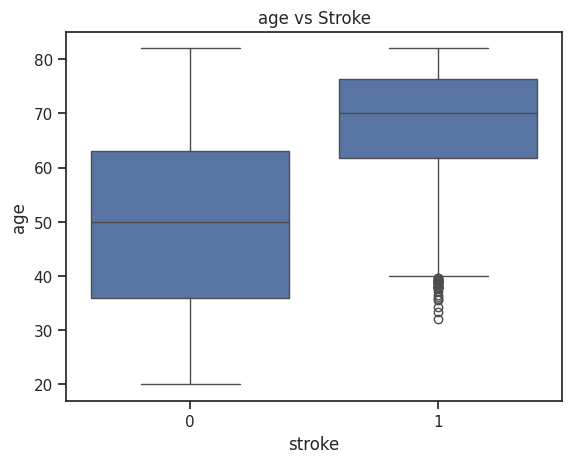

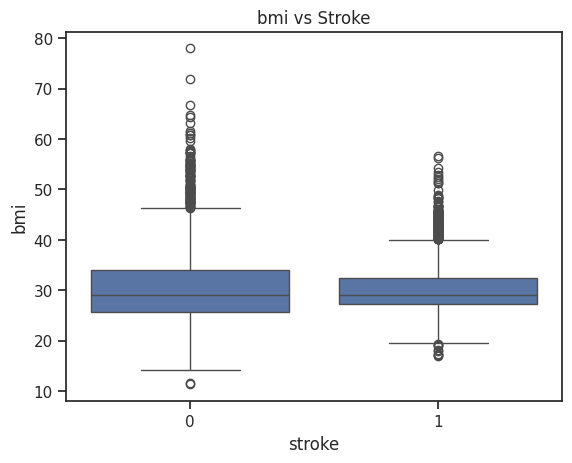

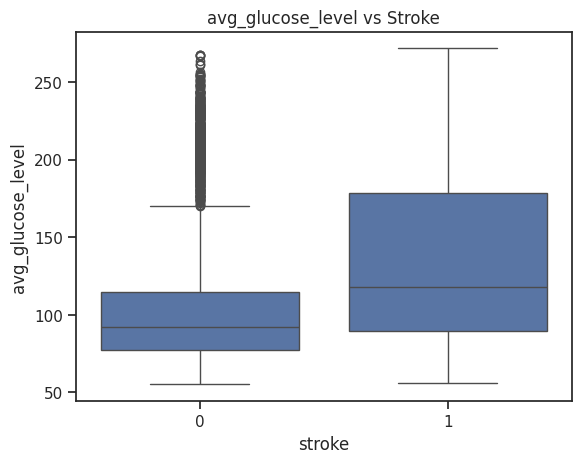

In [39]:
for col in ['age', 'bmi', 'avg_glucose_level']:  # 수치형 속성들
    sns.boxplot(x='stroke', y=col, data=df_resampled)
    plt.title(f'{col} vs Stroke')
    plt.show()
